<a href="https://colab.research.google.com/github/kimhj010502/ESAA_OB/blob/main/WEEK13_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> [파이썬 딥러닝 텐서플로] </b> <br>
## Chapter 03 케라스 (Keras)

## 3.1 딥러닝 준비 <br>
### 1-1 주요 용어 <br>
#### 1-1-1 하이퍼파라미터 (hyper-parameter)
- 딥러닝에서 말하는 하이퍼파라미터는 파이썬에서 배운 파라미터와는 달리 딥러닝 뿐만 아니라 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정 값을 뜻함
- 모델이 훈련하면서 가중치(weights)와 편향(bias)은 자동 업데이트되고 조정되며 알아서 변하는 값들이지만, 그 외에 학습 속도나 반복 훈련 횟수 등 사용자가 직접 설정해야 하는 값이 매우 많고 이러한 값들을 하이퍼파라미터라고 함
- 모델의 예측 성능을 높이기 위해 하이퍼파라미터 값들을 조절하는데 이 행위를 하이퍼파라미터 튜닝(tuning)이라고도 함
<br><br>

#### 1-1-2 과소적합 vs 과대적합 (underfitting vs overfitting)
- 머신러닝 학습에 있어 데이터는 train 데이터와 test 데이터로 구분할 수 있음
<br><img src='https://ifh.cc/g/JsjLyl.png' border='0'>
<br><br>
- 머신러닝에서 주어진 훈련 데이터에서 패턴 학습을 통해 모델을 완성해 나가는데, test 데이터가 train 데이터와 다른 분포를 갖거나, 혹은 train 데이터가 특정 레이블에 편향된 데이터로 이루어져 있다면 모델이 학습한 후 예측 성능이 현저하게 떨어지게 됨
<br><img src='https://ifh.cc/g/Bz8ZrY.png' border='0'>
<br><br>
- 모델이 충분히 학습되지 않은 경우에는 예측 성능이 떨어지며 이를 '과소적합'이라고 함
- 그와 반대로 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태를 '과대적합'이라고 함
- 과대적합에서는 훈련 데이터에 존재하는 불필요한 노이즈까지 과도하게 모델에 반영되어 주어진 train 데이터에 대한 예측 성능이 좋지만, 정작 test 데이터에 대한 예측 오차가 발생할 확률이 커짐
<br><img src='https://ifh.cc/g/DvwdVr.jpg' border='0'>
<br><br>
- 모델을 학습시킬 때는 과소적합과 과대적합 문제를 최소화하면서 정확도를 가장 높일 수 있도록 해야 함
- train 데이터의 분포가 test 데이터의 분포와 동일하게 구성해야 하며 불필요한 노이즈는 데이터 분석 및 전처리를 통해 해소해야 함
- train 데이터의 일부를 validation 데이터로 활용하여 검증 성능이 가장 좋은 구간을 모델의 가장 이상적으로 학습된 지점이라 판단하는 방법으로 최종 모델을 결정함
<br><br>

#### 1-1-3 에포크 (epoch)
- 딥러닝은 데이터셋을 학습하는 과정을 여러 번 반복(iteration)하면서 최적의 모델 가중치를 찾는 과정임
- 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프(loop)를 1 epoch라고 하며, 보통 '에포크'라고 읽음
- epoch 역시 중요한 하이퍼파라미터로, 모델이 과소적합되었다고 판단되면 epoch를 늘리고 빠르게 과대적합 구간으로 진입한다면 epoch를 줄여서 최적 구간에서 학습을 조기에 종료함으로써 과대적합을 방지하고 시간을 절약함
<br><br>

#### 1-1-4 손실함수 (loss function)
- 손실함수는 '예측 값과 정답 값의 차이 또는 오차(Error)'로 설명할 수 있으며, 오차는 딥러닝 모델의 출력 값과 실제 값과의 차이를 말함
- 딥러닝 모델에 적용하는 손실함수는 사용자가 정의해야 하며 분류나 회귀 모델에 따라 손실함수를 다르게 적용하는 것이 일반적임
<br><br>
- 지도 학습 (supervised learning)의 분류 문제는 이진 분류 (binary classification)와 다중 분류 (multi-class classifictaion)으로 구분할 수 있음
- 이진 분류 문제를 해결하기 위해서는 `binary_crossentropy` 손실함수를 사용하며, 출력층의 활성화 함수 (activation function)가 'sigmoid'인 경우를 말함
- 다중 분류 문제에는 `categorical_crossentropy` 손실함수를 사용하며, 다중 분류의 대상이 되는 클래스가 원핫 벡터 (one-hot vector)인 경우 사용함
- 정답 클래스가 원핫 인코딩이 아닌 레이블 값으로 표시되어 서로 다른 숫자로 구분되어 있으면 `sparse_categorical_crossentropy` 손실함수를 사용함
- 다중 분류 문제에서는 출력층의 활성함수로 'softmax'를 사용함
<br><br>
- 회귀 모델의 경우 평균제곱오차 (Mean Squared Error), 평균절대값오차 (Mean Absolute Error), 후버 (Huber) 등이 사용됨
<br><br>
- 텐서플로는 사전 정의된 손실함수를 함수형 (Functional API)과 클래스형 (Subclassing)으로 제공하고 있으며, 일반적으로 많이 사용하는 손실함수 목록은 다음과 같음
<br><img src='https://ifh.cc/g/LHbC0b.png' border='0'>
- 다음과 같이 클래스 및 함수 형태로 정의되어 있는 손실함수를 지정하여 사용함
``` python 
import tensorflow as tf
#클래스
tf.keras.losses.BinaryCrossentropy()
#함수
tf.keras.losses.binary_crossentropy()
```



#### 1-1-5 경사하강법 (gradient descent)
- 경사하강법은 딥러닝 모델을 훈련할 때, 모델 내부의 가중치(weight)에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법임
<br><img src='https://ifh.cc/g/O961KF.png' border='0'>
- 딥러닝 훈련 프로세스에서 경사하강법 알고리즘을 적용하여 손실함수 값을 최소로 만드는 가중치를 찾을 수 있고 경사하강법은 현재 공개된 다양한 옵티마이저(최적화 함수)의 근간이 되는 알고리즘임
<br><br>
- 손실함수 (Loss Function) 혹은 목적 함수 정의:
<br><a href='https://ifh.cc/v-796asB' target='_blank'><img src='https://ifh.cc/g/796asB.png' border='0'></a>
- $\frac12$은 가중치에 대한 그래디언트(gradient)를 계산하기 쉽도록 추가된 상수 값
- 다음의 단순회귀 수식이 주어졌을 때, 손실함수를 최소로 하는 w와 b를 구하는 과정을 경사하강법으로 구현:
<br><a href='https://ifh.cc/v-L49Phx' target='_blank'><img src='https://ifh.cc/g/L49Phx.png' border='0'></a>
- 샘플 데이터셋을 생성하는 함수를 정의하고 임의의 w와 b 값을 지정하여 주어진 x에 대한 y값을 생성하며, y값을 생성할 때 약간의 노이즈도 추가함

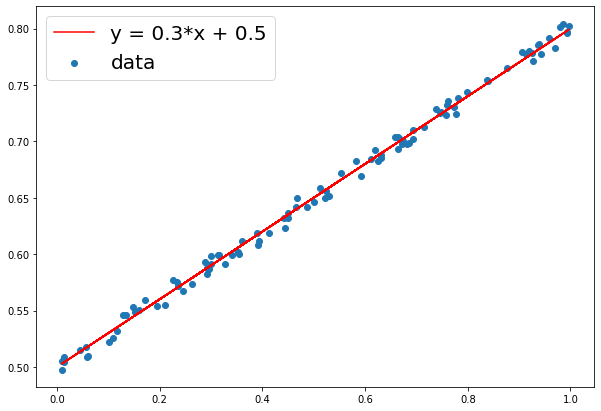

w: 0.3, b: 0.5


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#샘플에 활용할 데이터셋 생성
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10,7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

- 그래디언트는 손실함수를 w, b에 대한 각각의 편미분 값을 구한 뒤 학습률 계수를 곱하여 이전의 w, b로부터 차감함
<br><a href='https://ifh.cc/v-C8kAMR' target='_blank'><img src='https://ifh.cc/g/C8kAMR.png' border='0'></a>

- 손실함수를 w에 대한 편도함수로 유도
<br><a href='https://ifh.cc/v-5WWLhq' target='_blank'><img src='https://ifh.cc/g/5WWLhq.png' border='0'></a>

- 가중치 변화량인 그래디언트는 가중치 w에 대한 편도함수를 말하며 다음과 같이 정의함
<br><a href='https://ifh.cc/v-HHj1gJ' target='_blank'><img src='https://ifh.cc/g/HHj1gJ.png' border='0'></a>

- 그래디언트 w 업데이트 최종 수식은 다음과 같이 정의함
<br><a href='https://ifh.cc/v-nHYLSx' target='_blank'><img src='https://ifh.cc/g/nHYLSx.png' border='0'></a>

- 그래디언트 w를 구했듯이 똑같은 방식으로 그래디언트 b를 구함
- 손실함수를 b에 대한 편도함수로 유도
<br><a href='https://ifh.cc/v-XpoARj' target='_blank'><img src='https://ifh.cc/g/XpoARj.png' border='0'></a>

- w와 마찬가지로 학습률을 곱하여 그래디언트 b 업데이트 최종 수식을 다음과 같이 정의함
<br><a href='https://ifh.cc/v-8jZmLS' target='_blank'><img src='https://ifh.cc/g/8jZmLS.png' border='0'></a>

In [2]:
#최대 반복 횟수
num_epoch = 1000

#학습률
learning_rate = 0.005

#에러 기록
errors = []

#random한 값으로 w,b 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    #Hypothesis 정의
    y_hat = w * x + b
    #Loss Function 정의
    error = 0.5 * ((y_hat - y) ** 2).sum()
    if error < 0.005:
        break
    #Gradient 미분 계산
    w = w - learning_rate * ((y_hat - y) * x).sum()
    b = b - learning_rate * ((y_hat - y)).sum()

    errors.append(error)

    if epoch % 5 == 0:
        print('{0:2} w = {1:.5f}, b={2:.5f}, error={3:.5f}'.format(epoch, w, b, error))
  
print('----'*15)
print('{0:2} w = {1:.1f}, b = {2:.1f}, error={3:.5f}'.format(epoch, w, b, error))

 0 w = 0.32919, b=0.46960, error=0.08472
 5 w = 0.33000, b=0.48335, error=0.00513
------------------------------------------------------------
 6 w = 0.3, b = 0.5, error=0.00489


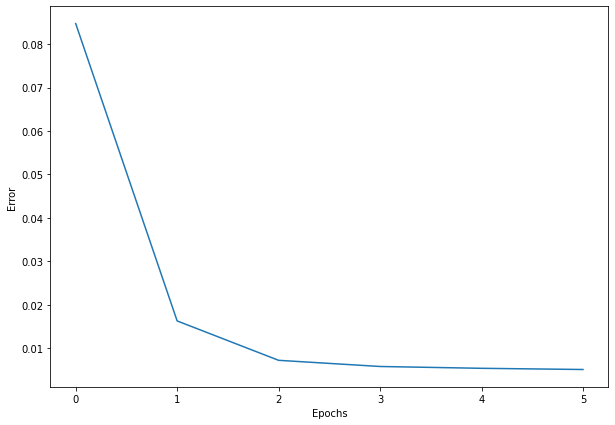

In [3]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

### 1-2 딥러닝 프로세스 <br>
<a href='https://ifh.cc/v-RYnxfK' target='_blank'><img src='https://ifh.cc/g/RYnxfK.png' border='0'></a>

- 데이터 전처리, 모델의 생성, 컴파일, 훈련은 모델의 훈련을 위한 필수 프로세스로 누락되는 단계는 없음
- 예측(predict)은 예측용 데이터셋을 입력하여 모델 예측 값을 얻는 과정이며, 검증(evaluate)은 모델의 성능을 평가하는 단계임
<br><br>

#### 1-1-1 데이터 전처리
- 데이터를 모델에 주입하기 전에 데이터를 가공하는 단계
- 때에 따라서는 배열의 차원을 변경하거나 스케일을 조정할 수 있음
<br><br>

#### 1-2-2 모델 생성
- 모델의 구조를 정의하고 생성하는 단계
- 모델을 생성하는 방법은 크게 세 가지로 구분할 수 있으며, 순차적인 구조의 모델은 Sequential API로 구현함
- 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델은 Functional API 혹은 Model Subclassing 방법으로 구현할 수 있음
<br><br>

#### 1-2-3 모델 컴파일
- 딥러닝 모델의 구조를 정의하고 생성한 뒤에는, 생성된 모델 훈련에 사용할 손실함수(loss), 옵티마이저(optimizer), 평가지표(metrics) 등을 정의함
- 모델 인스턴스에 `compile()` 메소드를 적용하고, 앞에서 열거한 여러 가지 속성 값을 설정함
<br><br>

#### 1-2-4 모델 훈련
- 모델을 훈련하는 단계
- `fit()` 함수에 모델 훈련에 필요한 정보를 매개변수 (훈련 데이터셋, 검증 데이터셋, epoch, 배치(batch) 크기 및 콜백(callback) 함수 등)로 전달함
<br><br>

#### 1-2-5 모델 검증
- 훈련이 완료된 모델을 검증하는 단계
- 모델을 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측 값을 정답과 비교하여 평가지표를 계산함
- 반환된 검증 결과를 토대로 잠재적인 모델의 성능 평가가 이루어지고 검증 결과를 바탕으로 다시 모델 생성 단계로 돌아가 모델 수정을 하고, 컴파일 및 훈련 과정을 거쳐 재평가하는 단계를 통해 목표 성능에 도달할 때까지 이 과정을 반복함
<br><br>

#### 1-2-6 모델 예측
- 훈련과 검증이 완료된 모델로 테스트셋에 대하여 모델이 예측하고 그 결과를 반환함


## 3.2 단순 신경망 훈련 <br>
### 2-1 선형회귀 <br>
- 회귀 분석이란 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법임
- 그 중에서도 단순선형회귀(simple linear regression) 모형은 하나의 X가 Y에 미치는 영향을 추정하며 1차 함수 관계로 나타낼 수 있음 → $y = ax+b$
<br><a href='https://ifh.cc/v-DX29Hf' target='_blank'><img src='https://ifh.cc/g/DX29Hf.png' border='0'></a>
<br><br>
- 텐서플로 케라스에서는 모델의 기울기 a와 절편 b를 업데이트하면서 종속변수 Y에 가장 근사한 1차 함수식을 완성해 나감
- 딥러닝에서는 기울기 a 대신 가중치(weight)을 의미하는 w를 더 많이 사용함 → $y = wx+b$
    - w: weight
    - b: bias






### 2-2 뉴런 (Neuron) <br>
- 뉴런은 인공 신경망 모델을 구성하는 하나의 신경을 의미하며, 노드(node)라고도 불림
- 신경망은 여러 개의 레이어(layer)를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성됨
- 뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트됨
- 역전파 (back propagation) 알고리즘은 신경망 모델의 파라미터들에 대한 그래디언트를 계산하는 방법을 의미함

### 2-3 Dense 레이어 <br>
- Dense 레이어는 심층 신경망 모델을 구성하는 가장 기본 레이어임
- 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에, 완전 연결층 (Fully Connected Layer)이라고 부르기도 함
<br><br>
- 아래는 4개의 Dense 레이어로 구성된 모델을 나타내며 입력 레이어 1개, 은닉 레이어 2개, 출력 레이어 1개로 구성되어 있음
- 각 레이어는 1개 이상의 뉴런으로 구성되는데, 입력 레이어에는 3개의 뉴런이 있고, 출력 레이어는 1개의 뉴런을 가짐
- 모든 뉴런들이 정보(텐서)의 흐름을 나타내는 화살표로 연결되어 있어서 완전연결층이라고 정의함
<br><a href='https://ifh.cc/v-bhDSF9' target='_blank'><img src='https://ifh.cc/g/bhDSF9.png' border='0'></a>
<br><br>
- Dense 레이어를 구성하는 노드 개수와 활성화 함수를 지정할 수 있으며 텐서플로의 layer 모듈에 있는 Dense 레이어로 쉽게 구현할 수 있음
- 노드의 개수를 Dense 레이어의 첫 번째 위치 인자로 지정하면 되고, activation 매개변수에 활성화 함수를 지정하여 적용할 수 있음
``` python
import tensorflow as tf
#10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)
#ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')
```

### 2-4 데이터셋 만들기

In [4]:
#샘플 데이터셋 생성
x = np.arange(1,6)

#y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


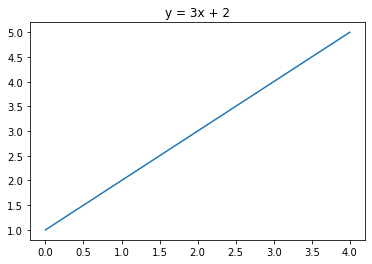

In [5]:
import matplotlib.pyplot as plt

#시각화
plt.plot(x)
plt.title('y = 3x + 2')
plt.show()

### 2-5 Sequential API <br>
- 텐서플로 케라스는 세 가지 방식으로 보델을 생성할 수 있는데, 그 중 케라스의 Sequential API를 사용하면 매우 간결하게 딥러닝 모델을 만들 수 잇음
- Sequential API 방식은 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식이므로 입력 레이어부터 출력 레이어까지 순서를 가짐
<br><br>
- 입력 데이터는 시퀀스의 가장 앞에 위치한 층에 투입되고, 순서대로 각 층을 하나씩 통과하면서 딥러닝 연산을 수행함
<br><a href='https://ifh.cc/v-WtLAPT' target='_blank'><img src='https://ifh.cc/g/WtLAPT.png' border='0'></a>
<br><br>
- 이처럼 직관적으로 구조를 이해할 수 있기 때문에, 케라스 모델을 생성하고 훈련하는 가장 간단한 방법이라고 말할 수 있지만, 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조를 만들 수 없다는 단점이 있음
<br><br>

#### 2-5-1 모델 구조
- Sequential API를 사용하여 모델 생성 시 다음과 같은 두 가지 방법으로 모델을 구성할 수 있음
<br><br>
- 리스트형 정의로 Sequential 클래스 함수에 파이썬 리스트 형태로 여러 개의 층을 입력함
``` python
import tensorflow as tf
#리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])
```
- add 함수로 레이어 추가로 Sequential 클래스 객체를 먼저 만든 뒤에, 생성된 모델 인스턴스에 층을 추가할 수 있음
``` python
#add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))
```
- Sequential API를 활용ㅇ하여 모델을 만들 때, 쌓고자 하는 레이어의 개수는 제한이 없음
<br><br>

#### 2-5-2 입력 데이터 형태
- Sequential API를 사용하여 모델을 구성할 때 반드시 첫 번째 층은 input_shape 매개변수를 지정해야 함
- input_shape 매개변수는 주입할 데이터셋의 shape을 투플 혹은 리스트로 지정할 수 있음
``` python
import tensorflow as tf
model = tf.keras.Sequential([
    #입력 데이터의 shape=(150,4)인 경우 input_shape 지정정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])
```
<br>

#### 2-5-3 단순선형회귀 모델 정의
- 단순선형회귀 모델을 만들기 위해서는 1개의 뉴런을 가지는 Dense 레이어 한 개를 사용함
- 여기에 정의한 1개의 뉴런은 기울기에 해당하는 w와 상수항에 해당하는 b를 매개변수로 가짐
- Dense 레이어는 `use_bias = True`가 기본 설정되어 상수항 b가 추가됨

In [6]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

### 2-6 모델 요약 <br>
- Sequential API로 모델을 만들었다면 `model.summary()`로 모델의 요약을 확인할 수 있음

In [7]:
#모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


- Total params는 모델 내부에 존재하는 모든 파라미터의 합계가 표기됨
- Trainable params는 모델 훈련 시 업데이트할 파라미터의 총 개수를 나타내고, Non-trainable params는 훈련 시 업데이트하지 않을 파라미터의 총 개수를 나타냄
- 단순선형회귀 모델에서는 업데이터 파라미터가 가중치 w와 편향 b 두 개이므로, 요약에서도 총 파라미터의 개수가 2개로 표기됨

### 2-7 컴파일 <br>
- 컴파일 단계에서는 모델의 훈련 과정에서 적용할 옵티마이저(optimizer), 손실함수(loss), 그리고 평가지표(metrics) 등을 정의함
- 클래스 인스턴스로 지정할 경우 학습률(learning rate), 모멘텀(momentum) 등의 하이퍼파라미터를 사용자가 직접 지정할 수 있음
- 하지만 문자열로 지정하는 경우 기본값으로 설정된 하이퍼 파라미터를 사용하며, 하이퍼파라미터 수정은 어렵다는 한계가 있음
``` python
#긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error','mean_absolute_error'])
```
``` python
#짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse','mae'])
```
``` python
#클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.losses.MeanAbsoluteError(),tf.keras.losses.MeanSquaredError()])
```


In [8]:
#컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

### 2-8 훈련 <br>
- 생성한 모델 인스턴스에 `fit()` 메소드를 적용하면, 데이터를 입력하여 모델을 훈련 (가중치(weight) 텐서를 업데이트하는 과정)할 수 있음
<br><br>
- fit() 메소드에는 훈련용 데이터셋의 입력(x)과 정답에 해당하는 출력(y), 그리고 반복 훈련할 epoch 수를 지정함
- 매 epoch가 끝날 때마다 훈련 데이터셋에 대한 손실과 평가지표를 출력하는데 `verbose = 0` 옵션을 지정하면, 이와 같은 훈련 중간 과정을 출력하지 않음
<br><br>
- fit() 메소드에 검증 데이터셋(validation_data) 옵션을 지정했다면 검증 셋에 대한 손실과 평가지표도 함께 출력함

In [9]:
#훈련
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 753ms/step - loss: 274.1031 - mae: 15.3193
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 159.7719 - mae: 11.7226
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 93.1452 - mae: 8.9770
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 54.3181 - mae: 6.8809
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 31.6914 - mae: 5.2806


- 위의 모델은 과소적합 상태이므로, epoch를 1200으로 지정하여 충분히 훈련할 수 있도록 함
- history 변수를 생성하고 fit() 메소드에 대한 반환값을 대입함
- fit() 메소드가 반환하는 history 변수는 epoch별 훈련 손실과 평가지표가 딕셔너리 형태로 저장됨

In [10]:
#단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

#컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

#훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 436ms/step - loss: 197.7412 - mae: 13.0598
Epoch 2/1200
1/1 [==============================] - 0s 16ms/step - loss: 115.2955 - mae: 10.0055
Epoch 3/1200
1/1 [==============================] - 0s 15ms/step - loss: 67.2499 - mae: 7.6737
Epoch 4/1200
1/1 [==============================] - 0s 11ms/step - loss: 39.2508 - mae: 5.8936
Epoch 5/1200
1/1 [==============================] - 0s 15ms/step - loss: 22.9339 - mae: 4.5345
Epoch 6/1200
1/1 [==============================] - 0s 10ms/step - loss: 13.4249 - mae: 3.4969
Epoch 7/1200
1/1 [==============================] - 0s 11ms/step - loss: 7.8831 - mae: 2.7047
Epoch 8/1200
1/1 [==============================] - 0s 9ms/step - loss: 4.6531 - mae: 2.0999
Epoch 9/1200
1/1 [==============================] - 0s 10ms/step - loss: 2.7705 - mae: 1.6380
Epoch 10/1200
1/1 [==============================] - 0s 10ms/step - loss: 1.6730 - mae: 1.2853
Epoch 11/1200
1/1 [==============================

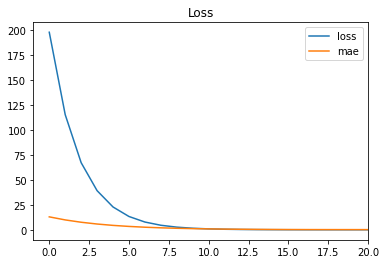

In [11]:
import matplotlib.pyplot as plt

#20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

### 2-9 검증 <br>
- 모델 인스턴스의 `evaluate()` 메소드로 모델의 성능을 검증할 수 있음
- 일반적으로 검증 데이터셋을 입력하여 검증함

In [12]:
#검증
model.evaluate(x,y)

1/1 [==============================] - 1s 696ms/step - loss: 4.4402e-05 - mae: 0.0057


[4.4401960622053593e-05, 0.005719375796616077]

- 검증 단계에서는 모델이 훈련을 마친 상태의 가중치를 그대로 적용하여 손실과 평가지표를 계산하기 때문에 모델 훈련 단계에서 1200번 epoch를 종료한 상태에서 출력된 값과 같음
<br><br>
- 사전에 별도의 검증 데이터셋을 준비하여 모델의 성능을 평가하는 것이 일반적이며 이 방법을 '교차 검증 (cross-validation)'이라고 부름
- 교차 검증 방법에는 홀드아웃(Hold-out), K-Fold 교차 검증 등이 있음

### 2-10 예측 <br>
- 훈련이 완료된 모델 인스턴스의 `predict()` 메소드에 새로운 입력 데이터를 넣어 주면 모델의 예측 값을 얻을 수 있음

In [13]:
#예측
model.predict([10])

1/1 [==============================] - 0s 300ms/step


array([[32.02764]], dtype=float32)

## 3.3 심층 신경망으로 이미지 분류 <br>
### 3-1 케라스 내장 데이터셋 로드 <br>
- boston_housing: 보스톤 주택 가격 데이터셋 (회귀)
- cifar10: CIFAR10 이미지 분류 데이터셋 (분류)
- cifar100: CIFAR100 이미지 분류 데이터셋 (분류)
- mnist: mnist 손글씨 데이터셋 (분류)
- fashion_mnist: 의류 데이터셋 (분류)
- imdb: IMDb 영화 데이터셋 (분류)
- reuters: Reuters 뉴스 토픽 (분류)






In [14]:
import tensorflow as tf

#케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [15]:
#load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [16]:
#로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


- x_train에는 28 x 28 픽셀 크기의 정사각형 이미지 60000장이 저장되어 있고, x_test에는 10000장의 이미지가 저장되어 있음

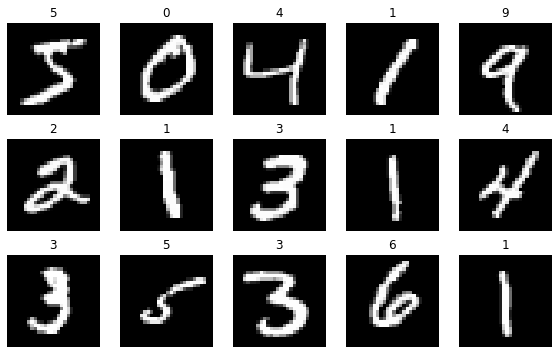

In [17]:
#데이터 시각화
import matplotlib.pyplot as plt

#canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
    ax = axes[i//5, i%5]
    #imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### 3-2 데이터 전처리

In [18]:
#x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [19]:
#픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

#데이터 정규화
x_train = x_train / x_train.max()

#정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [20]:
#test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [21]:
#변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

- 데이터를 정규화하는 이유는 입력 데이터가 정규화되어 모델이 학습하는 ㅕㅇ우 경사하강법 알고리즘에 의한 수렴 속도가 비정규화된 입력 데이터를 가질 때보다 더 빨리 수렴하기 때문임
- 또한 국소 최적(local optimum)에 빠지는 현상을 방지해주는 효과도 있음

### 3-3 Flatten 레이어 <br>
- 정규화를 하더라도 개별 데이터 값의 범위는 축소되지만, 원본 배열의 형태는 그대로 유지됨
- 샘플 이미지 형태는 (28,28)로 이루어져 있고 2차원 입력으로 볼 수 있는데, 2차원 입력은 Dense 레이어에 입력값으로 넣을 수 없음
- Dense 레이어에는 입력값으로 반드시 1차원 배열이 들어가야 함

In [22]:
print(f'변경 전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000,-1).shape}')

변경 전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


- 또는 다음과 같이 Flatten 레이어를 사용하면 다차원 데이터를 1차원으로 펼쳐주는 방법도 가능함

In [23]:
print(f'변경 전 shape: {x_train.shape}')

#Flatten 레이어 적용 후 shape 확인인
print(f'1D으로 shape 변경 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


### 3-4 활성화 함수 <br>
- 활성화 함수(Activation Function)는 입력을 비선형 출력으로 변환해주는 함수임
- 일반적으로 선형관계를 나타내는 함수에 비선형성을 추가해주는 방법으로 표현되기도 함
- 한편, 비선형성을 추가하지 않고 선형 함수로만 층을 구성한다면 모델을 깊게 구성하더라도 결국은 선형함수로 표현됨
<br><br>
- 자주 사용되는 활성화 함수로는 '시그모이드(Sigmoid)', '하이퍼볼릭 탄젠트(Hyperbolic Tangent 혹은 tanh)', 'ReLU(Rectified Unit)', 'Leaky ReLU' 등이 있음
- sigmoid
<br><a href='https://ifh.cc/v-KAyXOr' target='_blank'><img src='https://ifh.cc/g/KAyXOr.png' border='0'></a>
- tanh
<br><a href='https://ifh.cc/v-oVRTdQ' target='_blank'><img src='https://ifh.cc/g/oVRTdQ.png' border='0'></a>
- ReLU
<br><a href='https://ifh.cc/v-yLAqSz' target='_blank'><img src='https://ifh.cc/g/yLAqSz.png' border='0'></a>
- Leaky ReLU
<br><a href='https://ifh.cc/v-PVTHqW' target='_blank'><img src='https://ifh.cc/g/PVTHqW.png' border='0'></a>
<br><br>
- 텐서플로 케라스 레이어에 활성화 함수를 적용하고 싶다면 다음과 같이 설정함
``` python
#Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')
```
- 다음과 같이 별도의 층처럼 적용할 수도 있는데, 이러한 경우는 Dense 레이어 다음에 배치 정규화 (Batch Normalization)를 적용한 후 활성화 함수를 적용화하고자 할 때 많이 사용됨
``` python
#Dense 레이어에 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequantial([
    tf.keras.layers.Dense(128)
    tf.keras.layers.Activation('relu')
])
```

### 3-5 입력과 출력 <br>
- 분류 모델의 가장 마지막 레이어는 출력층으로, 출력층의 노드 개수는 반드시 분류해야 할 클래스의 개수와 동일해야 함
- mnist는 0~9까지 총 10개의 클래스로 이루어져 있기 때문에 마지막 출력층의 노드 개수는 10개가 되어야 함

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    #노드 = 10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax')
])

- 출력층의 노드 개수가 2개 이상인 경우는 softmax 활성화 함수를 적용함
- 즉, 다중 분류 문제에서는 softmax 활성화 함수를 사용해야 함
- 반면 이진 분류 모델의 출력층 노드 개수를 1개로 설정한 경우에는 sigmoid 활성화 함수를 적용함 
- 단, 이진 분류 모델이더라도 출력 레이어의 클래스를 원핫 인코딩으로 변환하여 노드 개수가 2개인 경우에는 softmax 함수를 사용함
``` python
#출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')
#출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')
```

### 3-6 손실함수 <br>
- 분류 모델의 손실함수는 모델의 출력층에 따라 올바른 손실함수를 설정해야만 모델이 정상적으로 훈련할 수 있음
<br><a href='https://ifh.cc/v-BHZcVT' target='_blank'><img src='https://ifh.cc/g/BHZcVT.png' border='0'></a>
- 이진 분류기 (binary classifier) 생성 시 출력층의 노드 개수가 1이면 `activation='sigmoid'`를 지정하며 손실함수는 `'binary_crossentropy'`를 지정함
``` python
#이진 분류 (출력 노드 개수 = 1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')
```
- 출력층의 노드 개수가 2개 이상일 경우 `activation='softmax'`와 같이 softmax로 지정하고 손실함수는 `'categorical_crossentropy'` 혹은 `'sparse_categorical_crossentropy'`을 지정함
``` python
#y가 원핫 벡터인 경우
#[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')
#y가 원핫 벡터가 아닌 경우
#[5]
model.compile(loss='sparse_categorical_crossentropy')
```


In [25]:
#mnist의 출력 데이터가 원핫 벡터가 아니고, 0~9까지 레이블 값을 가짐
model.compile(loss='sparse_categorical_crossentropy')

### 3-7 옵티마이저 <br>
- 옵티마이저(optimizer)는 손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법임
- 일반적으로 많이 사용되는 알고리즘은 Adam이며 대체적으로 좋은 성능을 발휘함
- 케라스에서 지원하는 옵티마이저 목록:
    - SGD
    - Adam
    - Adagrad
    - Nadam
    - RMSprop
    - Adadelta
    - Adamax
    - Ftrl
- 옵티마이저는 클래스 인스턴스로 지정하거나 문자열로 지정할 수 있는데, 클래스 인스턴스로 지정할 때는 문자열로 지정할 때와 다르게 학습률(learning_rate, lr)과 같은 하이퍼파라미터를 직접 설정할 수 있음

In [26]:
#클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

#문자열로 지정
model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### 3-8 평가지표 <br>
- 분류 모델에 대한 평가지표(metrics)는 정확도를 나타내는 'accuracy'가 가장 많이 사용되며 'auc', 'precision', 'recall' 등의 지표도 많이 사용됨

In [27]:
#클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [28]:
#문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 3-9 훈련 <br>
- mnist 손글씨 데이터셋은 10000개로 구성된 별도의 검증 셋이 존재함 → (x_test, y_test)
- 모델을 훈련할 때 검증 셋을 추가 지정하면, 매 epoch마다 훈련 손실과 검증 손실, 그리고 각 셋에 대한 평가지표를 나란히 출력함
- 검증 셋을 지정하는 방법은 `validation_data` 매개변수에 투플 형식의 검증 셋을 지정해주면 됨

In [29]:
#훈련
model.fit(x_train, y_train,
          #검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2261 - accuracy: 0.9336 - val_loss: 0.1033 - val_accuracy: 0.9673
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0918 - accuracy: 0.9714 - val_loss: 0.0991 - val_accuracy: 0.9685
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0636 - accuracy: 0.9801 - val_loss: 0.0762 - val_accuracy: 0.9760
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0489 - accuracy: 0.9843 - val_loss: 0.0957 - val_accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0383 - accuracy: 0.9876 - val_loss: 0.0701 - val_accuracy: 0.9804
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0309 - accuracy: 0.9899 - val_loss: 0.0872 - val_accuracy: 0.9771
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.0739 - val_ac

### 3-10 평가 <br>
- 10회의 epoch가 끝나고 훈련이 종료된 뒤 `evaluate()` 메소드로 모델 성능을 검증하고 평가 결과를 확인할 수 있음

In [30]:
#검증
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0910 - accuracy: 0.9779
검증 셋 정확도: 0.9779000282287598


### 3-11 예측 <br>
- `predict()` 메소드에 이미지 데이터를 넣어주면 모델의 예측 결과를 반환함

In [31]:
#예측
predictions = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [33]:
#예측 결과 출력
predictions[0] #10개의 확률값 출력

array([2.3506338e-13, 4.9499005e-09, 9.1837854e-10, 6.3339787e-09,
       3.8548102e-09, 1.9073783e-12, 1.8659174e-13, 9.9999923e-01,
       6.7023138e-09, 7.1831931e-07], dtype=float32)

- 모델의 마지막 출력층의 노드 개수가 10개로 지정되었기 때문에 10개의 값이 출력됨
- softmax 활성화 함수를 거친 10개의 출력 값은 순차적으로 0~9까지의 10개의 개별 클래스에 대한 분류 확률값을 나타냄
- 이 중 가장 높은 확률값을 가진 클래스가 최종 예측된 클래스임

In [34]:
import numpy as np

#0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

#첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 6 9]


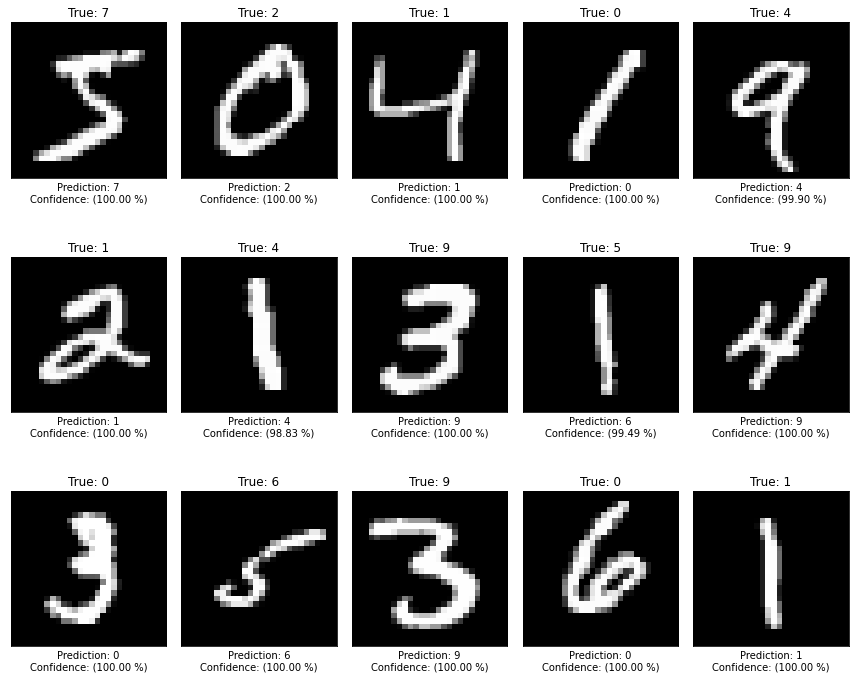

In [35]:
#데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100 * np.max(predictions[idx])
    return img, y_true, y_pred, confidence

#canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)

for i in range(15):
    ax = axes[i//5, i%5]
    img, y_true, y_pred, confidence = get_one_result(i)
    #imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()

## 3.4 모델 세부 설정





In [37]:
import tensorflow as tf

#케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

#load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

#데이터 정규화
x_train = x_train / x_train.max() #max: 255
x_test = x_test / x_test.max() #max: 255

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


### 4-1 초기값 설정 <br>
- Dense 레이어는 기본 초기값으로 GlorotUniform 초기화 방법이 설정되어 있는데, 레이어의 초기화 방법을 다르게 설정할 수 있음

In [38]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

- 기본값으로 설정된 GlorotUniform 초기화 방법을 HeNormal로 변경하기 위해서는 `kernel_initializer` 매개변수에 설정하면 됨

In [39]:
#문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

#클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
print(dense.get_config()['kernel_initializer'])

{'class_name': 'HeNormal', 'config': {'seed': None}}
{'class_name': 'HeNormal', 'config': {'seed': None}}


- 케라스에서 지원하는 자주 사용되는 초기화 목록:
    - 'glorot_normal', 'glorot_uniform': 글로럿 초기화 (Xavier 초기화)
    - 'lecun_normal', 'lecun_uniform': Yann Lecun 초기화
    - 'he_normal', 'he_uniform': He 초기화
    - 'random_normal', 'random_uniform': 정규 분포, 연속균동 분포 초기화

### 4-2 규제 (Regularization) <br>
- 모델의 과대적합을 해소하기 위해 L1, L2 규제를 적용하기도 함
- 텐서플로 케라스 레이어는 기본값으로 규제를 적용하지 않고 있으므로 레이어에 규제를 적용하기 위해서는 별도로 설정해 주어야 함

In [40]:
#기본값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_9',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

- 규제를 적용하기 위해서는 `kernel_regularizer`에 규제를 지정하면 됨

In [41]:
#l1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

#클래스 인스턴스 적용, alpha=0.1 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


### 4-3 드롭아웃 (Dropout) <br>
- 딥러닝 모델의 가장 큰 난제가 바로 과대적합 문제인데, 딥러닝 모델의 층이 넓고 깊어질 때 (wide-and-deep) 모델은 훈련에 주어진 샘플을 과하게 적합하도록 학습하는 경향이 있음
- 따라서 훈련할 때 만나지 못하나 새로운 데이터에 대해서는 좋지 않은 예측력을 보일 때가 많음
- 드롭아웃은 모델의 과대적합 문제를 해결하기 위해 제안된 아이디어이며, 실무적으로 상당히 좋은 효과를 보이는 것으로 알려져 있음
<br><br><a href='https://ifh.cc/v-fQ0J0N' target='_blank'><img src='https://ifh.cc/g/fQ0J0N.png' border='0'></a>
- 왼쪽 그림을 보면 모든 노드들이 연결되어 있는 데에 반해, 오른쪽 그림은 모든 노드가 연결되어 있지 않고 확률적으로 몇 개의 신호는 끊겨 있음
- 이렇게 노드의 일부 신호를 임의로 삭제하게 되면, 모델이 학습하는 가중치 파라미터의 개수가 현저하게 줄어들게 되기 때문에 모델이 쉽게 과대적합하는 것을 방지할 수 있음
<br><br>
- 중요한 점은 모델이 훈련할 때는 드롭아웃이 적용되어 노드 중 일부만 훈련하게 되지만, 예측 시점에는 모든 노드들이 활용됨


In [42]:
#Dropout 25% 비율 적용 (25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

### 4-4 배치 정규화 (Batch Normalization) <br>
- 배치 정규화는 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화함
- 다음 층으로 데이터가 전달되기 전에 스케일을 조정하기 때문에 보다 안정적인 훈련이 가능하고 성능을 크게 향상시킬 수 있음
<br><br>
- 배치 정규화 층은 케라스에서 클래스 함수로 지원하기 때문에 별도로 코드를 구현할 필요가 없고, 클래스 인스턴스를 생성하여 추가해주면 됨


In [49]:
#Model A: Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_a.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                50240     
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [50]:
#Model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Dense(10, activation='softmax')
])
model_b.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_5 (Batc  (None, 32)               128       
 hNormalization)                                      

- 동일한 조건에서 10번의 epoch동안 model_a, model_B 두 모델을 훈련한 결과는 다음과 같음
<br><a href='https://ifh.cc/v-dqgx53' target='_blank'><img src='https://ifh.cc/g/dqgx53.png' border='0'></a>
- 그래프를 보면, 정규화만 추가하였는데 손실은 이전 대비 더 안정적이고 빠르게 수렴하는 것을 확인할 수 있음
<br><br>
- 데이터 개수가 적은 편인 mnist 손글씨 데이터셋에서는 큰 차이를 보이지 않을 수 있지만, 더 크고 복잡한 데이터셋에서는 배치 정규화 유무가 모델 성능에 크게 영향을 미치는 경우도 있으므로 배치 정규화를 적극 적용해 볼 필요가 있음

### 4-5 활성화 (activation) 함수


In [51]:
#LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

#LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [52]:
#Model C: Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),
    
    tf.keras.layers.Dense(10, activation='softmax')
])

#모델 요약
model_c.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_7 (Batc  (None, 32)               128       
 hNormalization)                                      

- model_a: Dense 레이어 + ReLU 활성화 함수
- model_b: Dense 레이어 + 배치 정규화 + ReLU 활성화 함수
- model_c: Dense 레이어 + 배치 정규화 + LeakyReLU(0.2) 활성화 함수

In [53]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Model A: Dense + ReLU
history_a = model_a.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=10)

#Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=10)

#Model C: Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2838 - accuracy: 0.9176 - val_loss: 0.1629 - val_accuracy: 0.9484
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1329 - accuracy: 0.9600 - val_loss: 0.1094 - val_accuracy: 0.9668
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0960 - accuracy: 0.9711 - val_loss: 0.0996 - val_accuracy: 0.9676
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0750 - accuracy: 0.9771 - val_loss: 0.0920 - val_accuracy: 0.9713
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0620 - accuracy: 0.9810 - val_loss: 0.0975 - val_accuracy: 0.9701
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0520 - accuracy: 0.9838 - val_loss: 0.1015 - val_accuracy: 0.9689
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0440 - accuracy: 0.9858 - val_loss: 0.0905 - val_accur

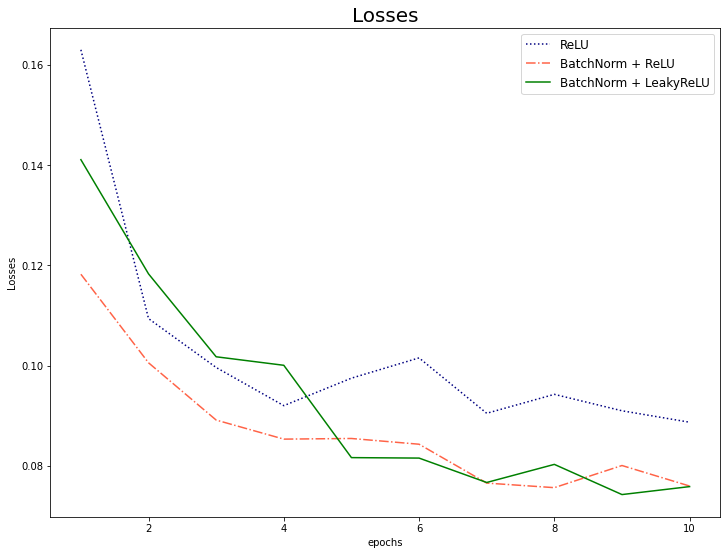

In [55]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.plot(np.arange(1,11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1,11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1,11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU', 'BatchNorm + LeakyReLU'], fontsize=12)
plt.show()